In [1]:
import mlflow
import pandas as pd

# Setze das Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Hole die Runs aus einem Experiment
experiment_name = "Bitcoin Price Movement Prediction LSTM v2"
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Lade die Runs
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_id)

# Konvertiere die Runs in ein DataFrame
runs_df = pd.DataFrame([run.data.metrics for run in runs])
params_df = pd.DataFrame([run.data.params for run in runs])
metrics_df = runs_df.join(params_df)

# Konvertiere relevante Spalten zu numerischen Werten
metrics_df['learning_rate'] = metrics_df['learning_rate'].astype(float)
metrics_df['epochs'] = metrics_df['epochs'].astype(int)
metrics_df['seq_length'] = metrics_df['seq_length'].astype(int)
metrics_df['batch_size'] = metrics_df['batch_size'].astype(int)
metrics_df['accuracy'] = metrics_df['accuracy'].astype(float)

# Überprüfe die Daten
metrics_df.head()


,loss,accuracy,learning_rate,epochs,batch_size,seq_length
0,0.693244,0.510145,0.001,30,32,60
1,0.693507,0.514451,0.001,30,32,50
2,0.693505,0.495677,0.001,30,32,40
3,0.693014,0.522988,0.001,30,32,30
4,0.692859,0.515759,0.001,30,32,20


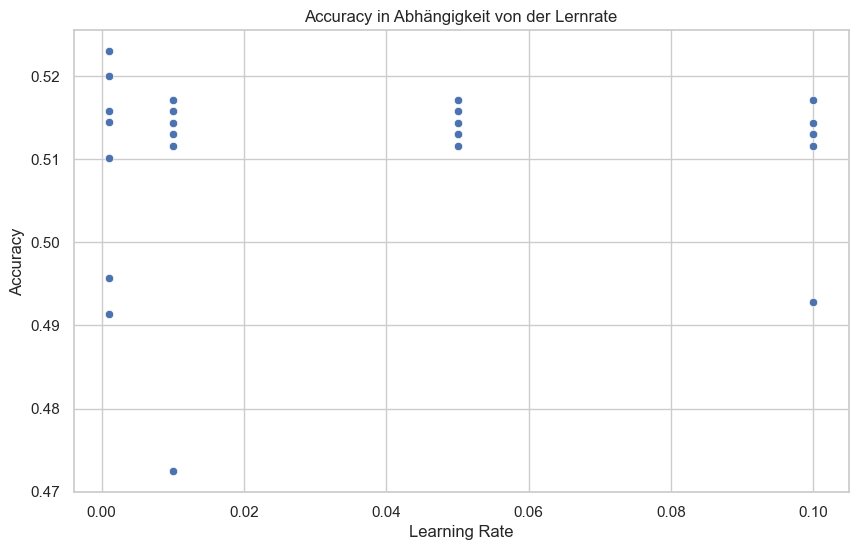

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Erstelle einen Scatterplot für die Lernrate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='learning_rate', y='accuracy', data=metrics_df)
plt.title('Accuracy in Abhängigkeit von der Lernrate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


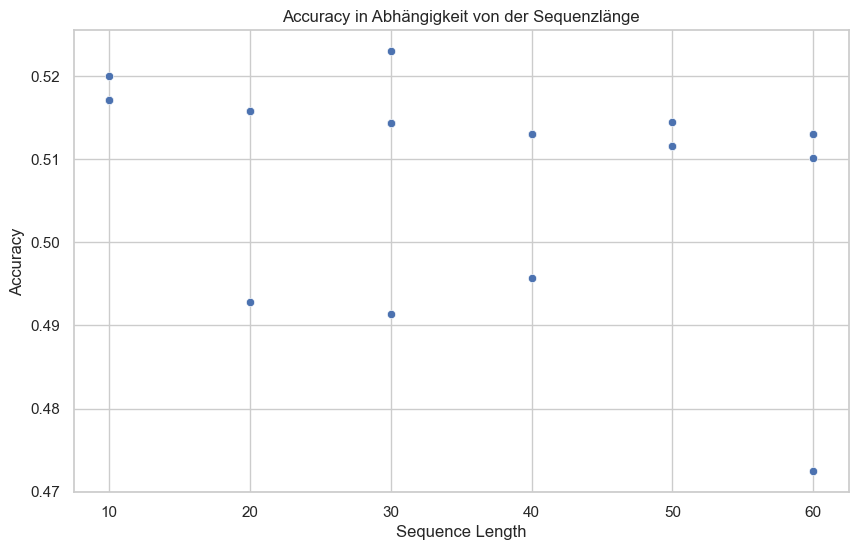

In [4]:
# Erstelle einen Scatterplot für die Sequenzlänge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seq_length', y='accuracy', data=metrics_df)
plt.title('Accuracy in Abhängigkeit von der Sequenzlänge')
plt.xlabel('Sequence Length')
plt.ylabel('Accuracy')
plt.show()


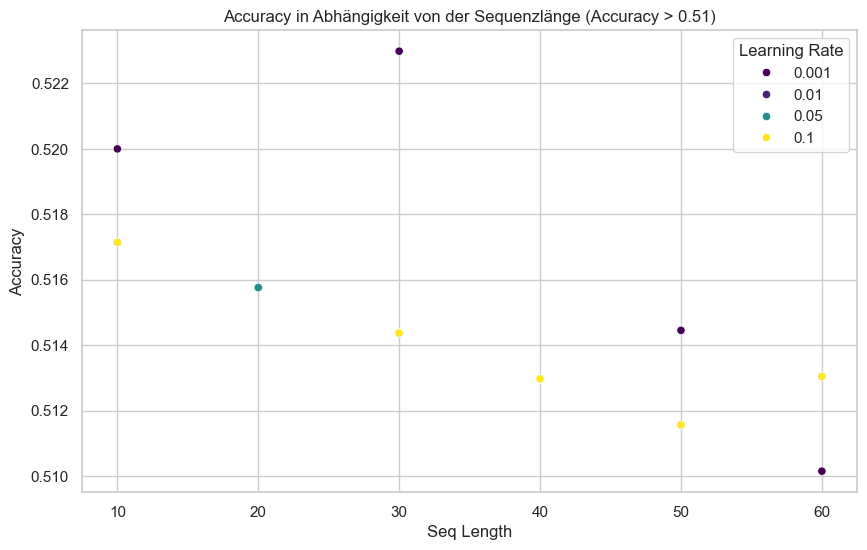

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtere Modelle mit einer Accuracy von mehr als 0.51
filtered_df = metrics_df[metrics_df['accuracy'] > 0.51]

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Erstelle einen Scatterplot für die Sequenzlänge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seq_length', y='accuracy', hue='learning_rate', data=filtered_df, palette='viridis', sizes=(20, 200))
plt.title('Accuracy in Abhängigkeit von der Sequenzlänge (Accuracy > 0.51)')
plt.xlabel('Seq Length')
plt.ylabel('Accuracy')
plt.legend(loc='best', title='Learning Rate')
plt.show()

In [9]:
# Lade die Runs
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_id)

# Konvertiere die Runs in ein DataFrame
runs_df = pd.DataFrame([run.data.metrics for run in runs])
params_df = pd.DataFrame([run.data.params for run in runs])
metrics_df = runs_df.join(params_df)

# Konvertiere relevante Spalten zu numerischen Werten
metrics_df['learning_rate'] = metrics_df['learning_rate'].astype(float)
metrics_df['epochs'] = metrics_df['epochs'].astype(int)
metrics_df['seq_length'] = metrics_df['seq_length'].astype(int)
metrics_df['batch_size'] = metrics_df['batch_size'].astype(int)
metrics_df['accuracy'] = metrics_df['accuracy'].astype(float)

# Filtere Modelle mit einer Accuracy von mehr als 0.51
filtered_df = metrics_df[metrics_df['accuracy'] > 0.51]

# Wähle die Top 5 Modelle basierend auf Accuracy
top_5_df = filtered_df.nlargest(5, 'accuracy')
top_5_df


,loss,accuracy,learning_rate,epochs,batch_size,seq_length
3,0.693014,0.522988,0.001,30,32,30
5,0.692877,0.520000,0.001,30,32,10
11,0.692823,0.517143,0.010,30,32,10
17,0.693563,0.517143,0.050,30,32,10
23,0.692726,0.517143,0.100,30,32,10


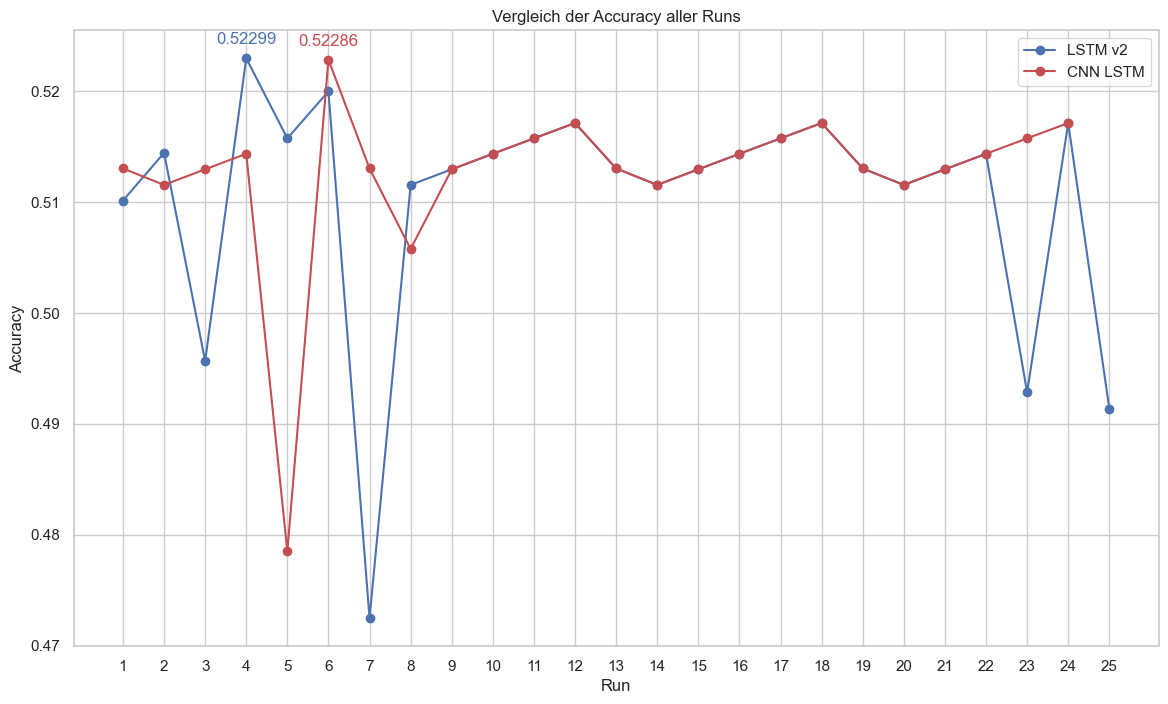

In [63]:
import mlflow
import numpy as np
import matplotlib.pyplot as plt

def get_accuracies_and_runs(experiment_name):
    client = mlflow.tracking.MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    runs = client.search_runs(experiment_ids=[experiment.experiment_id])

    accuracies = []
    run_numbers = []

    for idx, run in enumerate(runs):
        accuracy = run.data.metrics.get('accuracy')
        if accuracy is not None:
            accuracies.append(accuracy)
            run_numbers.append(idx + 1)  # Nummeriere die Runs ab 1

    return run_numbers, accuracies

# Setzen des MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Extrahiere die Ergebnisse für beide Experimente
lstm_runs, lstm_accuracies = get_accuracies_and_runs("Bitcoin Price Movement Prediction LSTM v2")
cnn_lstm_runs, cnn_lstm_accuracies = get_accuracies_and_runs("Bitcoin Price Movement Prediction CNN LSTM")

# Plotten der Accuracy im Verhältnis zu den Runs
plt.figure(figsize=(14, 8))

plt.plot(lstm_runs, lstm_accuracies, marker='o', linestyle='-', color='b', label='LSTM v2')
plt.plot(cnn_lstm_runs, cnn_lstm_accuracies, marker='o', linestyle='-', color='r', label='CNN LSTM')

# Annotiere die höchste Accuracy
max_lstm_accuracy = max(lstm_accuracies)
max_lstm_run = lstm_runs[lstm_accuracies.index(max_lstm_accuracy)]
plt.annotate(f'{max_lstm_accuracy:.5f}', (max_lstm_run, max_lstm_accuracy), textcoords="offset points", xytext=(0,10), ha='center', color='b')

max_cnn_lstm_accuracy = max(cnn_lstm_accuracies)
max_cnn_lstm_run = cnn_lstm_runs[cnn_lstm_accuracies.index(max_cnn_lstm_accuracy)]
plt.annotate(f'{max_cnn_lstm_accuracy:.5f}', (max_cnn_lstm_run, max_cnn_lstm_accuracy), textcoords="offset points", xytext=(0,10), ha='center', color='r')

plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Vergleich der Accuracy aller Runs')
plt.grid(True)
plt.xticks(np.arange(1, max(max(lstm_runs), max(cnn_lstm_runs)) + 1, 1))  # Setze die x-Achsenbeschriftungen auf die Run-Nummern
plt.legend()

plt.show()


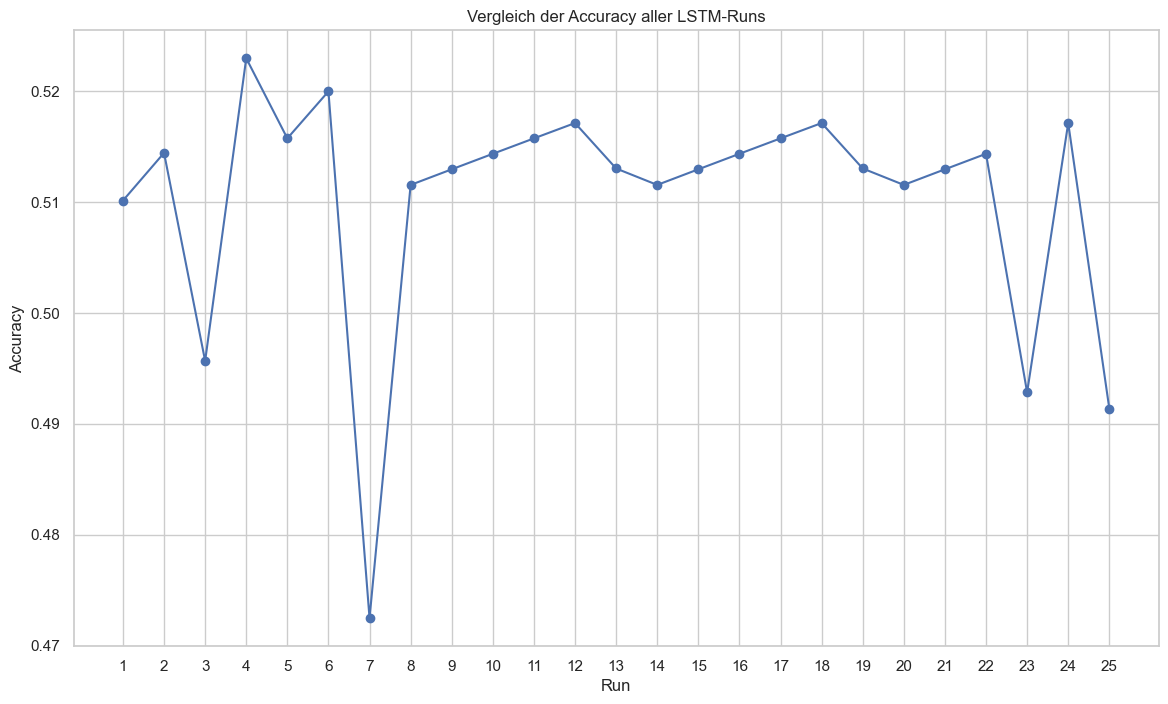

In [61]:
import mlflow
import numpy as np
import matplotlib.pyplot as plt

# Setzen des MLflow Tracking URI und Anlegen eines neuen Experiments
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction LSTM v2"

# Extrahiere die Ergebnisse und plotte Accuracy vs. Runs
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

accuracies = []
run_numbers = []

for idx, run in enumerate(runs):
    accuracy = run.data.metrics.get('accuracy')
    if accuracy is not None:
        accuracies.append(accuracy)
        run_numbers.append(idx + 1)  # Nummeriere die Runs ab 1

# Plotten der Accuracy im Verhältnis zu den Runs
plt.figure(figsize=(14, 8))
plt.plot(run_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Vergleich der Accuracy aller LSTM-Runs')
plt.grid(True)
plt.xticks(run_numbers)  # Setze die x-Achsenbeschriftungen auf die Run-Nummern

plt.show()


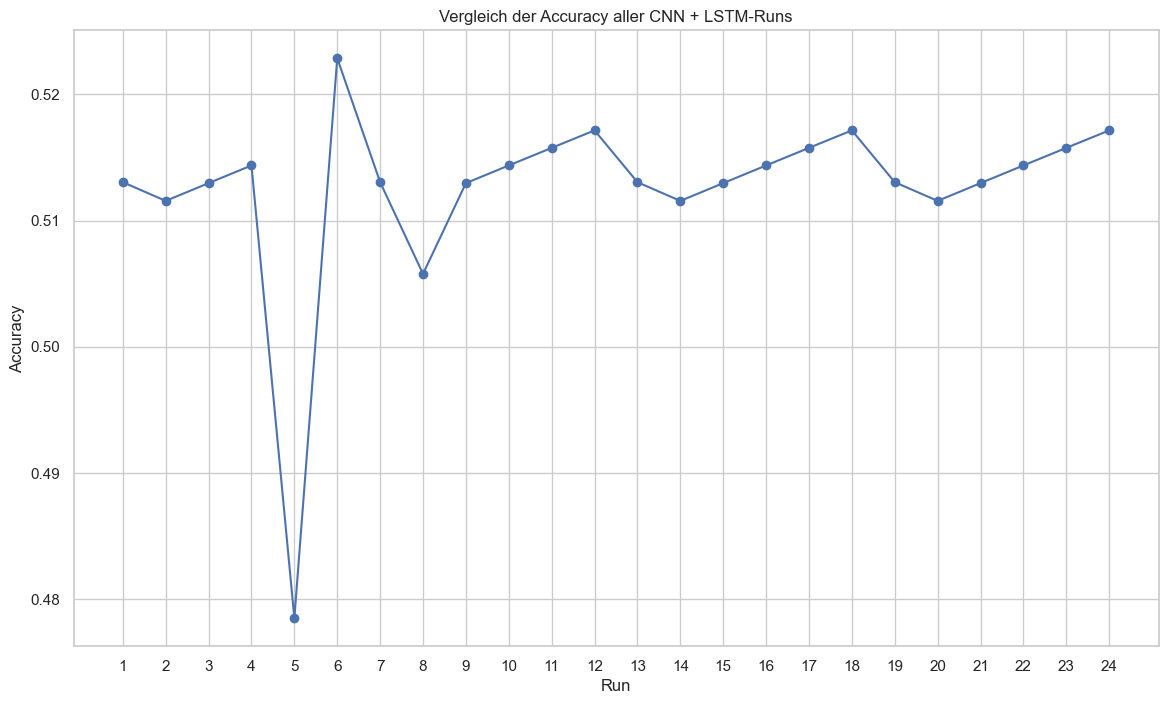

In [60]:
import mlflow
import numpy as np
import matplotlib.pyplot as plt

# Setzen des MLflow Tracking URI und Anlegen eines neuen Experiments
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction CNN LSTM"

# Extrahiere die Ergebnisse und plotte Accuracy vs. Runs
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

accuracies = []
run_numbers = []

for idx, run in enumerate(runs):
    accuracy = run.data.metrics.get('accuracy')
    if accuracy is not None:
        accuracies.append(accuracy)
        run_numbers.append(idx + 1)  # Nummeriere die Runs ab 1

# Plotten der Accuracy im Verhältnis zu den Runs
plt.figure(figsize=(14, 8))
plt.plot(run_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Vergleich der Accuracy aller CNN + LSTM-Runs')
plt.grid(True)
plt.xticks(run_numbers)  # Setze die x-Achsenbeschriftungen auf die Run-Nummern

plt.show()


In [56]:
import mlflow
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Setzen des MLflow Tracking URI und Anlegen eines neuen Experiments
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction LSTM v2"

# Extrahiere die Ergebnisse und finde den Run mit der höchsten Accuracy
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

# Finde den Run mit der höchsten Accuracy
best_run = None
best_accuracy = 0.0

for run in runs:
    accuracy = run.data.metrics.get('accuracy')
    if accuracy is not None and accuracy > best_accuracy:
        best_accuracy = accuracy
        best_run = run

if best_run is None:
    print("Kein Run mit Accuracy-Metrik gefunden.")
else:
    # Extrahiere die relevanten Metriken und Parameter des besten Runs
    best_run_id = best_run.info.run_id
    print(f"Beste Run ID: {best_run_id}")
    print(f"Beste Accuracy: {best_accuracy}")

    # Logge weitere Metriken und Parameter des besten Runs
    metrics = best_run.data.metrics
    params = best_run.data.params
    print("\nMetriken:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    
    print("\nParameter:")
    for key, value in params.items():
        print(f"{key}: {value}")

    # Laden des besten Modells
    model_uri = f"runs:/{best_run_id}/model"
    model = mlflow.keras.load_model(model_uri)

    # Laden der Testdaten (angenommen, sie sind gespeichert)
    # Ersetzen Sie diesen Abschnitt durch Ihren Code zum Laden der Testdaten
    # Beispiel:
    # X_test = ...
    # y_test = ...
    
    # Ersetzen Sie diesen Abschnitt durch Ihren eigenen Testdatensatz
    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')

    # Vorhersagen mit dem besten Modell
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Berechnung der Confusion Matrix und des Classification Reports
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print("\nConfusion Matrix:")
    print(cm)
    
    print("\nClassification Report:")
    print(cr)


Beste Run ID: fba338e6caf841b79cbc4fcf97c135d4
Beste Accuracy: 0.522988498210907

Metriken:
loss: 0.6930137872695923
accuracy: 0.522988498210907

Parameter:
learning_rate: 0.001
epochs: 30
batch_size: 32
seq_length: 30


FileNotFoundError: [Errno 2] No such file or directory: 'X_test.npy'

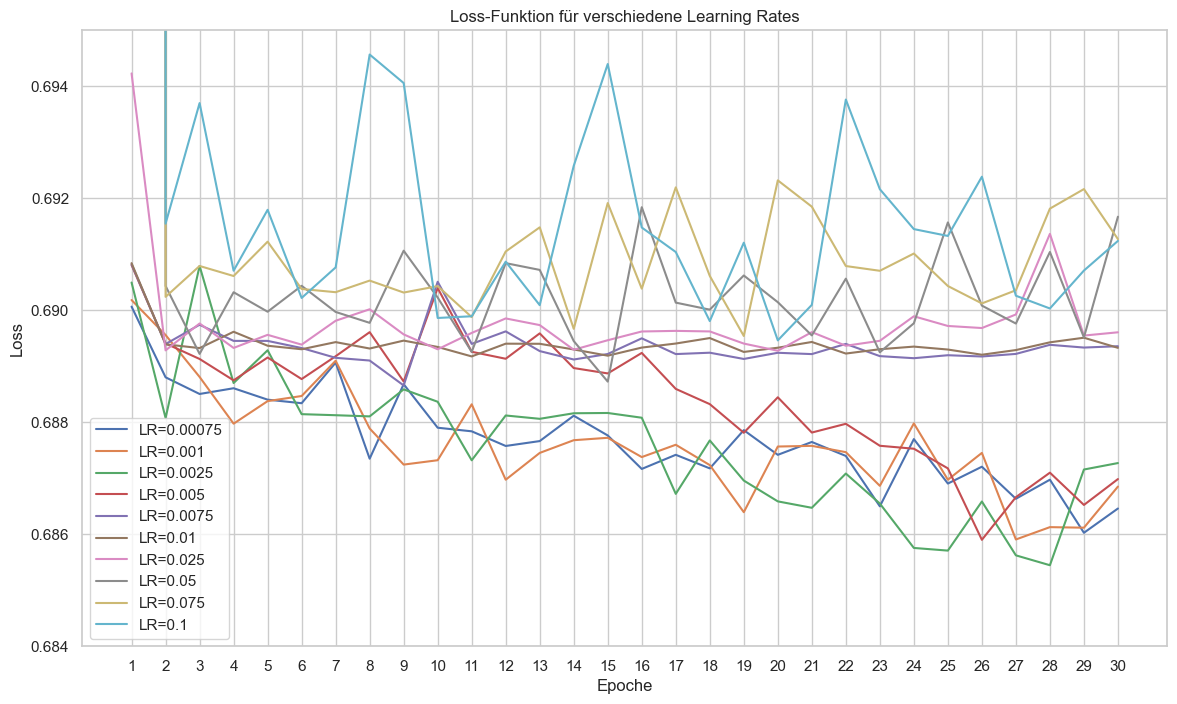

In [28]:
import mlflow
import numpy as np
import matplotlib.pyplot as plt

# Setzen des MLflow Tracking URI und Anlegen eines neuen Experiments
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction CNN LSTM Learning Rate"

# Extrahiere die Ergebnisse und plotte Learning Rate vs. Loss
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

all_history = {}

for run in runs:
    learning_rate = float(run.data.params['learning_rate'])
    loss_history = [run.data.metrics[f'loss_epoch_{epoch}'] for epoch in range(30)]  # Assuming 30 epochs
    all_history[learning_rate] = loss_history

# Plotten des Verlaufs der Verlustfunktion für jede Lernrate
plt.figure(figsize=(14, 8))

for lr, loss_history in all_history.items():
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=f'LR={lr}')

plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss-Funktion für verschiedene Learning Rates')
plt.ylim(0.684, 0.695)  # Setze den Bereich der y-Achse von 0.68 bis 0.7
plt.xticks(np.arange(1, 31, 1))  # Setze die x-Achse von 1 bis 30
plt.legend()
plt.grid(True)
plt.show()


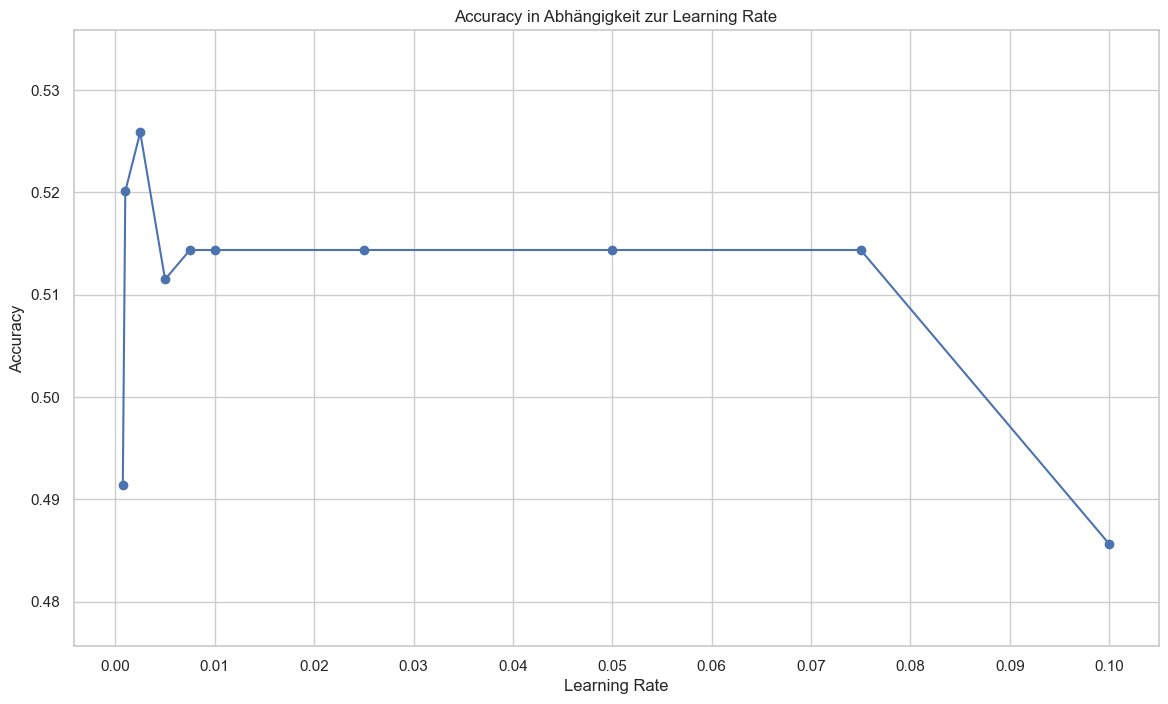

In [55]:
import mlflow
import numpy as np
import matplotlib.pyplot as plt

# Setzen des MLflow Tracking URI und Anlegen eines neuen Experiments
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction CNN LSTM Learning Rate"

# Extrahiere die Ergebnisse und plotte Learning Rate vs. Accuracy
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

learning_rates = []
accuracies = []

for run in runs:
    learning_rate = float(run.data.params['learning_rate'])
    accuracy = run.data.metrics['accuracy']  # Verwende die Genauigkeit, die für den einzelnen Run geloggt wurde
    learning_rates.append(learning_rate)
    accuracies.append(accuracy)

# Plotten der Genauigkeit im Verhältnis zur Lernrate
plt.figure(figsize=(14, 8))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('linear')  # Setze die x-Achse auf eine lineare Skala
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy in Abhängigkeit zur Learning Rate')
plt.grid(True)

# Setze die x-Achsenbeschriftungen auf sinnvolle Werte in 0.01-Schritten
xticks = np.arange(0, 0.1 + 0.01, 0.01)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels([f'{xtick:.2f}' for xtick in xticks])

# Setze die y-Achsenbeschriftungen auf sinnvolle Werte
min_acc = min(accuracies)
max_acc = max(accuracies)
plt.ylim(min_acc - 0.01, max_acc + 0.01)  # Füge etwas Puffer zu den y-Achsenwerten hinzu

plt.show()


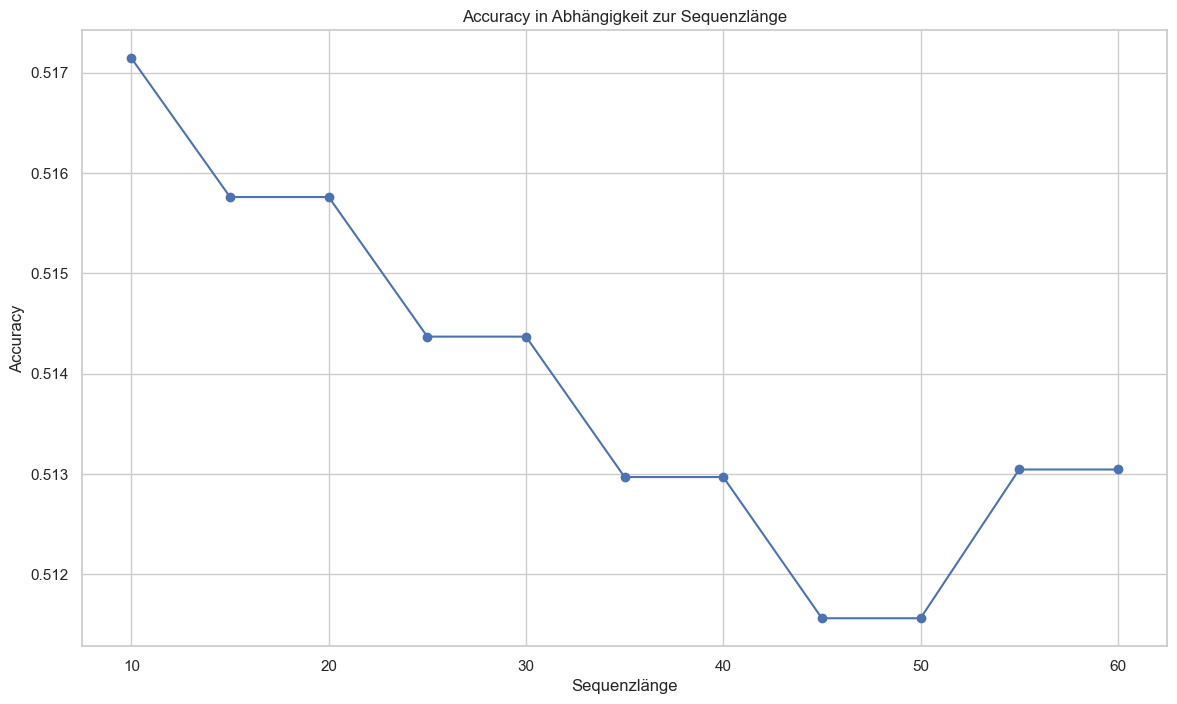

In [16]:
import mlflow
import matplotlib.pyplot as plt

# Setzen des MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:8080")
experiment_name = "Bitcoin Price Movement Prediction CNN LSTM Sequence Length"

# Extrahiere die Ergebnisse und plotte Accuracy vs. Sequence Length
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[experiment.experiment_id])

seq_lengths = []
accuracies = []

for run in runs:
    seq_length = int(run.data.params['seq_length'])
    accuracy = run.data.metrics['accuracy']
    seq_lengths.append(seq_length)
    accuracies.append(accuracy)

# Plotten der Genauigkeit vs. Sequenzlänge
plt.figure(figsize=(14, 8))
plt.plot(seq_lengths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Sequenzlänge')
plt.ylabel('Accuracy')
plt.title('Accuracy in Abhängigkeit zur Sequenzlänge')
plt.grid(True)
plt.show()
